In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.(unpack zip)
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | andra
Processing Record 3 of Set 1 | pilar
Processing Record 4 of Set 1 | sorong
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | fairbanks
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | huilong
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | yerbogachen
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | zhigansk
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Se

City not found. Skipping...
Processing Record 37 of Set 4 | churapcha
Processing Record 38 of Set 4 | te anau
Processing Record 39 of Set 4 | luwingu
Processing Record 40 of Set 4 | vila do maio
Processing Record 41 of Set 4 | araria
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | praia
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | tazmalt
Processing Record 46 of Set 4 | najran
Processing Record 47 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 4 | sola
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | yenagoa
Processing Record 3 of Set 5 | porto santo
Processing Record 4 of Set 5 | san pedro
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 8 of Set 5 | pitimbu

Processing Record 26 of Set 8 | zvishavane
Processing Record 27 of Set 8 | fort nelson
Processing Record 28 of Set 8 | teya
Processing Record 29 of Set 8 | marcona
City not found. Skipping...
Processing Record 30 of Set 8 | wenatchee
Processing Record 31 of Set 8 | port-gentil
Processing Record 32 of Set 8 | olafsvik
Processing Record 33 of Set 8 | fuxin
Processing Record 34 of Set 8 | coihaique
Processing Record 35 of Set 8 | terney
Processing Record 36 of Set 8 | ileza
Processing Record 37 of Set 8 | peniche
Processing Record 38 of Set 8 | didsbury
Processing Record 39 of Set 8 | cuaspud
Processing Record 40 of Set 8 | pimenta bueno
Processing Record 41 of Set 8 | saurimo
Processing Record 42 of Set 8 | damara
Processing Record 43 of Set 8 | mogzon
Processing Record 44 of Set 8 | kattivakkam
Processing Record 45 of Set 8 | lata
Processing Record 46 of Set 8 | darhan
Processing Record 47 of Set 8 | moron
Processing Record 48 of Set 8 | sudak
Processing Record 49 of Set 8 | shubarshi
P

Processing Record 14 of Set 12 | urengoy
Processing Record 15 of Set 12 | san quintin
Processing Record 16 of Set 12 | korcula
Processing Record 17 of Set 12 | flinders
Processing Record 18 of Set 12 | roald
Processing Record 19 of Set 12 | nanakuli
Processing Record 20 of Set 12 | ust-omchug
Processing Record 21 of Set 12 | kilosa
Processing Record 22 of Set 12 | yilan
Processing Record 23 of Set 12 | muscat
Processing Record 24 of Set 12 | goma
Processing Record 25 of Set 12 | tawau
Processing Record 26 of Set 12 | burica
City not found. Skipping...
Processing Record 27 of Set 12 | saint andrews
Processing Record 28 of Set 12 | brooks
Processing Record 29 of Set 12 | bella vista
Processing Record 30 of Set 12 | kieta
Processing Record 31 of Set 12 | antalaha
Processing Record 32 of Set 12 | sisimiut
Processing Record 33 of Set 12 | melnikovo
Processing Record 34 of Set 12 | carballo
Processing Record 35 of Set 12 | oranjemund
Processing Record 36 of Set 12 | la union
Processing Recor

In [19]:
len(city_data)

559

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,69.10,84,46,18.70,ZA,2022-02-06 00:12:24
1,Andra,62.5147,65.8878,5.00,96,87,4.99,RU,2022-02-06 00:12:25
2,Pilar,-9.5972,-35.9567,75.63,70,99,5.35,BR,2022-02-06 00:12:26
3,Sorong,-0.8833,131.2500,81.79,79,100,11.34,ID,2022-02-06 00:12:27
4,Khatanga,71.9667,102.5000,-20.45,98,99,3.78,RU,2022-02-06 00:12:28
5,Atuona,-9.8000,-139.0333,78.33,79,11,21.99,PF,2022-02-06 00:12:29
6,Mar Del Plata,-38.0023,-57.5575,63.09,77,75,5.99,AR,2022-02-06 00:12:30
7,Fairbanks,64.8378,-147.7164,14.22,78,100,0.00,US,2022-02-06 00:12:14
8,Vaini,-21.2000,-175.2000,78.08,88,100,25.12,TO,2022-02-06 00:12:31
9,Huilong,31.8111,121.6550,41.04,57,59,4.07,CN,2022-02-06 00:11:22


In [30]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2022-02-06 00:12:24,-33.9180,25.5701,69.10,84,46,18.70
1,Andra,RU,2022-02-06 00:12:25,62.5147,65.8878,5.00,96,87,4.99
2,Pilar,BR,2022-02-06 00:12:26,-9.5972,-35.9567,75.63,70,99,5.35
3,Sorong,ID,2022-02-06 00:12:27,-0.8833,131.2500,81.79,79,100,11.34
4,Khatanga,RU,2022-02-06 00:12:28,71.9667,102.5000,-20.45,98,99,3.78
5,Atuona,PF,2022-02-06 00:12:29,-9.8000,-139.0333,78.33,79,11,21.99
6,Mar Del Plata,AR,2022-02-06 00:12:30,-38.0023,-57.5575,63.09,77,75,5.99
7,Fairbanks,US,2022-02-06 00:12:14,64.8378,-147.7164,14.22,78,100,0.00
8,Vaini,TO,2022-02-06 00:12:31,-21.2000,-175.2000,78.08,88,100,25.12
9,Huilong,CN,2022-02-06 00:11:22,31.8111,121.6550,41.04,57,59,4.07


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

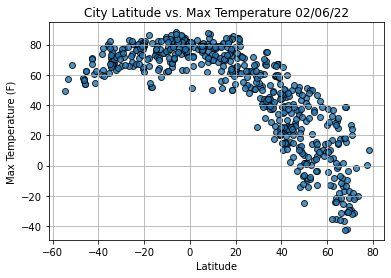

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

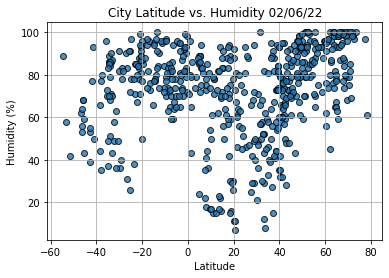

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

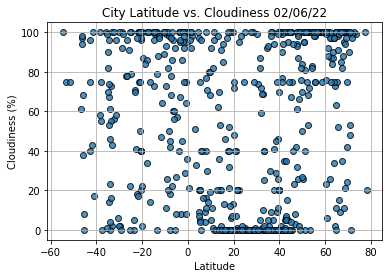

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

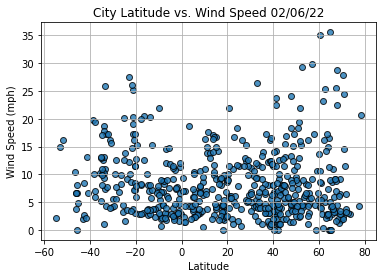

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()